In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat
import uncertainties.unumpy as unp
import math
import scipy.constants as const

In [69]:
t1=np.genfromtxt('daten.dat', usecols=(0))
u1=np.genfromtxt('daten.dat', usecols=(1))
t2=np.genfromtxt('daten.dat', usecols=(2))
u2=np.genfromtxt('daten.dat', usecols=(3))
N=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
print(t1,t2)

[14.  15.2 45.2 39.7 34.3 28.7 22.9 17.2 11.2  5.5 40.7 59.2] [45.3 44.1 10.7 16.8 21.  29.1 35.1 41.  46.7  0.  12.2 59.2]


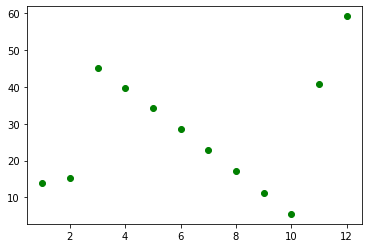

In [51]:
plt.plot(N,t1, 'go')
#plt.plot(N,t2, 'ro')

In [62]:
#Bestimmung der Schallgeschwindigkeit
y=np.genfromtxt('positionen.dat', usecols=(1))
d=np.genfromtxt('positionen.dat', usecols=(2))
U=[0]
yf=U*len(y)
df=U*len(d)
a=0
while a<len(y):
    yf[a]=ufloat(y[a],0.1)
    a=a+1
b=0
while b<len(d):
    df[b]=ufloat(d[b],0.1)
    b=b+1
h=yf[11]
H=h/1000
C1=2*H/(t1[11]/1e6)
print('Schallgeschwindigkeit:',C1,'m/s')

Schallgeschwindigkeit: 2685.8+/-3.4 m/s


In [68]:
#Positionen der Fehlstellen
s1=(C1*t1/2e6)
s1mm=s1*1000
c=0
e=0
f=0
Soll=U*11
Abweichung=U*11
while c<11:
    Soll[c]=yf[11]-(yf[c]+df[c])
    c=c+1

while e<len(Soll):
    Abweichung[e]=100*(Soll[e]-s1mm[e])/Soll[e]
    e=e+1
while f<len(Soll):
    print('Loch Nr:',f+1,' Position:',s1mm[f],' Soll:',Soll[f],' Abweichung',Abweichung[f],'%')
    f=f+1

Loch Nr: 1  Position: 18.801+/-0.024  Soll: 17.00+/-0.17  Abweichung -10.6+/-1.1 %
Loch Nr: 2  Position: 20.412+/-0.026  Soll: 19.20+/-0.17  Abweichung -6.3+/-0.9 %
Loch Nr: 3  Position: 60.70+/-0.08  Soll: 60.10+/-0.17  Abweichung -1.00+/-0.24 %
Loch Nr: 4  Position: 53.31+/-0.07  Soll: 52.70+/-0.17  Abweichung -1.16+/-0.28 %
Loch Nr: 5  Position: 46.06+/-0.06  Soll: 45.40+/-0.17  Abweichung -1.46+/-0.33 %
Loch Nr: 6  Position: 38.54+/-0.05  Soll: 37.90+/-0.17  Abweichung -1.7+/-0.4 %
Loch Nr: 7  Position: 30.75+/-0.04  Soll: 29.90+/-0.17  Abweichung -2.9+/-0.5 %
Loch Nr: 8  Position: 23.098+/-0.029  Soll: 21.85+/-0.17  Abweichung -5.7+/-0.8 %
Loch Nr: 9  Position: 15.041+/-0.019  Soll: 13.80+/-0.17  Abweichung -9.0+/-1.3 %
Loch Nr: 10  Position: 7.386+/-0.009  Soll: 5.80+/-0.17  Abweichung -27+/-4 %
Loch Nr: 11  Position: 54.66+/-0.07  Soll: 58.10+/-0.17  Abweichung 5.93+/-0.23 %


In [67]:
#Position der Fehlstellen gedreht
s2=(C1*t2/2e6)
s2mm=s2*1000
h=0
g=0
Abweichung2=U*11
while h<len(Soll):
    Abweichung2[h]=100*(yf[h]-s2mm[h])/yf[h]
    h=h+1
while g<len(Soll):
    print('Loch Nr:',g+1,' Position:',s2mm[g],' Soll:',yf[g],' Abweichung',Abweichung2[g],'%')
    g=g+1


Loch Nr: 1  Position: 60.83+/-0.08  Soll: 61.20+/-0.10  Abweichung 0.60+/-0.20 %
Loch Nr: 2  Position: 59.22+/-0.07  Soll: 59.00+/-0.10  Abweichung -0.38+/-0.21 %
Loch Nr: 3  Position: 14.369+/-0.018  Soll: 13.40+/-0.10  Abweichung -7.2+/-0.8 %
Loch Nr: 4  Position: 22.561+/-0.028  Soll: 21.80+/-0.10  Abweichung -3.5+/-0.5 %
Loch Nr: 5  Position: 28.201+/-0.035  Soll: 30.20+/-0.10  Abweichung 6.62+/-0.33 %
Loch Nr: 6  Position: 39.08+/-0.05  Soll: 38.60+/-0.10  Abweichung -1.24+/-0.29 %
Loch Nr: 7  Position: 47.14+/-0.06  Soll: 46.60+/-0.10  Abweichung -1.15+/-0.25 %
Loch Nr: 8  Position: 55.06+/-0.07  Soll: 54.65+/-0.10  Abweichung -0.75+/-0.22 %
Loch Nr: 9  Position: 62.71+/-0.08  Soll: 62.70+/-0.10  Abweichung -0.02+/-0.20 %
Loch Nr: 10  Position: 1.3429+/-0.0017  Soll: 70.70+/-0.10  Abweichung 98.101+/-0.004 %
Loch Nr: 11  Position: 16.383+/-0.021  Soll: 11.40+/-0.10  Abweichung -43.7+/-1.3 %


Messschieber Y: [61.85, 59.65, 16.4, 24.3, 32.15, 40.1, 48.1, 56.15, 64.2, 72.2, 16.4]
Messschieber X: [ 15.8  14.   30.4  43.8  57.3  72.9  87.8 102.8 118.  133.  129.5 149.5]
Messung 1: [57.09932432432433, 55.487837837837844, 15.200675675675676, 22.586655405405402, 29.83834459459461, 37.358614864864876, 45.14746621621622, 52.80202702702703, 60.859459459459465, 68.51402027027028, 21.24375]
Messung 2: [60.83361486486486, 59.222128378378386, 14.369087837837837, 22.560810810810814, 28.201013513513512, 39.078547297297305, 47.13597972972973, 55.05912162162162, 62.71368243243243, 1.3429054054054053, 16.383445945945947]


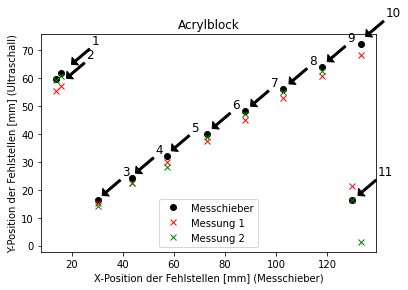

In [130]:
x=np.genfromtxt('positionen.dat', usecols=(0))
i=0
j=0
k=10
s1mmff=U*(len(s1mm)-1)
s1mmffg=U*(len(s1mm)-1)
s2mmff=U*(len(s2mm)-1)
yd=U*(len(s2mm)-1)
xkurz=U*(len(s2mm)-1)
while i<(len(s1mm)-1):
    s1mmff[i]=s1mm[i].nominal_value
    s1mmffg[i]=75.9-s1mmff[i]
    s2mmff[i]=s2mm[i].nominal_value
    yd[i]=y[i]+(0.5*d[i])
    xkurz[i]=x[i]
    i=i+1


plt.plot(xkurz,yd,'ko',label='Messchieber')
plt.plot(xkurz,s1mmffg,'rx',label='Messung 1')
plt.plot(xkurz,s2mmff,'gx',label='Messung 2')

plt.xlabel('X-Position der Fehlstellen [mm] (Messchieber)')
plt.ylabel('Y-Position der Fehlstellen [mm] (Ultraschall)')
plt.title('Acrylblock')
plt.legend(loc='best')
plt.annotate(r'1', xy=(20,65), xycoords='data',xytext=(+20, +20), textcoords='offset points', fontsize=12,arrowprops=dict(facecolor='black', headwidth=10,  headlength=5, width=2))
plt.annotate(r'2', xy=(18,60), xycoords='data',xytext=(+20, +20), textcoords='offset points', fontsize=12,arrowprops=dict(facecolor='black', headwidth=10,  headlength=5, width=2))
plt.annotate(r'3', xy=(32,18), xycoords='data',xytext=(+20, +20), textcoords='offset points', fontsize=12,arrowprops=dict(facecolor='black', headwidth=10,  headlength=5, width=2))
plt.annotate(r'4', xy=(45,26), xycoords='data',xytext=(+20, +20), textcoords='offset points', fontsize=12,arrowprops=dict(facecolor='black', headwidth=10,  headlength=5, width=2))
plt.annotate(r'5', xy=(59,34), xycoords='data',xytext=(+20, +20), textcoords='offset points', fontsize=12,arrowprops=dict(facecolor='black', headwidth=10,  headlength=5, width=2))
plt.annotate(r'6', xy=(75,42), xycoords='data',xytext=(+20, +20), textcoords='offset points', fontsize=12,arrowprops=dict(facecolor='black', headwidth=10,  headlength=5, width=2))
plt.annotate(r'7', xy=(90,50), xycoords='data',xytext=(+20, +20), textcoords='offset points', fontsize=12,arrowprops=dict(facecolor='black', headwidth=10,  headlength=5, width=2))
plt.annotate(r'8', xy=(105,58), xycoords='data',xytext=(+20, +20), textcoords='offset points', fontsize=12,arrowprops=dict(facecolor='black', headwidth=10,  headlength=5, width=2))
plt.annotate(r'9', xy=(120,66), xycoords='data',xytext=(+20, +20), textcoords='offset points', fontsize=12,arrowprops=dict(facecolor='black', headwidth=10,  headlength=5, width=2))
plt.annotate(r'10', xy=(135,75), xycoords='data',xytext=(+20, +20), textcoords='offset points', fontsize=12,arrowprops=dict(facecolor='black', headwidth=10,  headlength=5, width=2))
plt.annotate(r'11', xy=(132,18), xycoords='data',xytext=(+20, +20), textcoords='offset points', fontsize=12,arrowprops=dict(facecolor='black', headwidth=10,  headlength=5, width=2))
plt.savefig('acrylblock.pdf')
print('Messschieber Y:', yd)
print('Messschieber X:', x)
print('Messung 1:',s1mmffg)
print('Messung 2:',s2mmff)

In [112]:
liste1=[1,2,3]
liste=[]
liste3=[5,6,7]
liste2=liste1+liste+liste3
print(liste2)

[1, 2, 3, 5, 6, 7]
